<a href="https://colab.research.google.com/github/mugivijaygovindraj/seven7codetech/blob/main/cricket_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Create data frames needed for analysis by importing .csv files
grounds = pd.read_csv('Ground_Averages.csv')
odi_match_results = pd.read_csv('ODI_Match_Results.csv')
odi_match_totals = pd.read_csv('ODI_Match_Totals.csv')
bowler_data = pd.read_csv('Bowler_data.csv')
batsman_data = pd.read_csv('Batsman_Data.csv')
wc_players = pd.read_csv('WC_players.csv')

In [3]:
#different datafeames
print(grounds.shape)
print(odi_match_results.shape)
print(odi_match_totals.shape)
print(bowler_data.shape)
print(batsman_data.shape)
print(wc_players.shape)

(106, 11)
(1322, 12)
(1296, 13)
(11118, 14)
(11149, 13)
(152, 3)


different columns in dataframes

In [4]:
grounds.head(2)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60


In [5]:
odi_match_results.head(2)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6


In [6]:
odi_match_totals.head(2)

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6


In [7]:
bowler_data.head(2)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619


In [8]:
batsman_data.head(2)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619


In [9]:
wc_players.head(2)

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan


data visualization

In [10]:
# For visualizations
import plotly as plt
import seaborn as sns

<ipython-input-11-5ff80df2aa45>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(odi_match_totals.corr(),annot=True)


<Axes: >

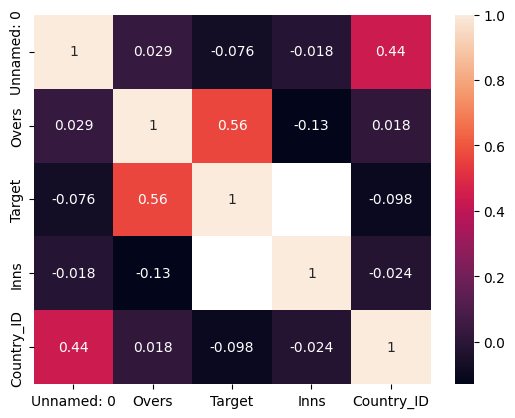

In [11]:
sns.heatmap(odi_match_totals.corr(),annot=True)

from above it can be observed that overs and target increase with respect to each other

<ipython-input-12-402887db7fb5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(grounds.corr( ),annot=True)


<Axes: >

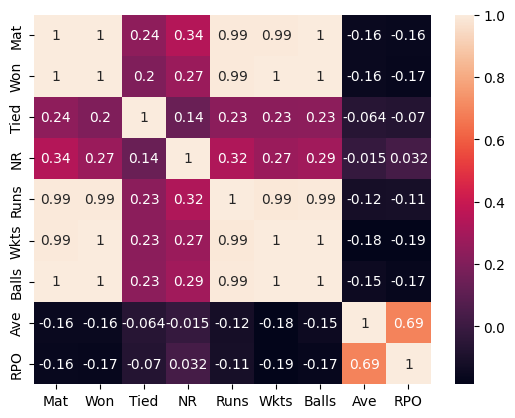

In [12]:
sns.heatmap(grounds.corr( ),annot=True)

from above heatmap it can be observed that there is 99% correlation between balls and runs scored.

99% correlation between matches won and runs scored.

avg runs and runs scored per over are correlated by 69%.

In [13]:
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

In [14]:
print(odi_match_totals.Ground)

0          Kolkata
1          Kolkata
2            Delhi
3            Delhi
4        Melbourne
           ...    
1291    Nottingham
1292    Nottingham
1293       Belfast
1294         Leeds
1295         Leeds
Name: Ground, Length: 1296, dtype: object


In [15]:
#Total Grounds
WC_Ground_Stats = []
ODI_Grounds = odi_match_totals.Ground
for i in ODI_Grounds:
    for j in WC_venue_pitches:
        if i in j:
            WC_Ground_Stats.append((i,j))

In [16]:
Ground_names = dict(set(WC_Ground_Stats))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'Birmingham': 'Edgbaston, Birmingham',
 "Lord's": "Lord's, London",
 'The Oval': 'The Oval, London',
 'Southampton': 'Rose Bowl, Southampton',
 'Leeds': 'Headingley, Leeds',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Manchester': 'Old Trafford, Manchester',
 'Bristol': 'County Ground, Bristol',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'Nottingham': 'Trent Bridge, Nottingham'}

In [17]:
# matching odi data withgrounds
WC_Grounds_History = odi_match_totals[odi_match_totals.Ground.isin([Ground[0] for Ground in WC_Ground_Stats])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.head()

<ipython-input-17-893cb219338d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)


,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5


In [18]:
# number of matches played on each world cup venue in England after 2012
ground_stats = WC_Grounds_History.groupby('Ground')['Ground'].count()
ground_stats

Ground
County Ground, Bristol                  7
Edgbaston, Birmingham                  30
Headingley, Leeds                      12
Lord's, London                         13
Old Trafford, Manchester               12
Riverside Ground, Chester-le-Street     6
Rose Bowl, Southampton                 16
Sophia Gardens, Cardiff                28
The Oval, London                       34
Trent Bridge, Nottingham               18
Name: Ground, dtype: int64

In [27]:
# country results in percent
winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1
Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head()

<ipython-input-27-8e7f1f5645ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winnings["count"] = 1
<ipython-input-27-8e7f1f5645ea>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()


,Country,Result,Count
0,Australia,lost,55.0
1,Australia,n/r,20.0
2,Australia,won,25.0
3,Bangladesh,lost,50.0
4,Bangladesh,n/r,25.0


In [28]:
# Find matches won on WC venues based on country value provided
def findMatchesWon(country):
    country_played = WC_Grounds_History['Country'] == country
    won = WC_Grounds_History['Result']=='won'
    country_stats = WC_Grounds_History[country_played & won].groupby('Ground')['Ground'].count()
    return country_stats
# Find matches played WC venues based on country value provided
def findMatchesPlayed(country):
    return WC_Grounds_History[WC_Grounds_History['Country'] == country].groupby('Ground')['Ground'].count()

In [49]:
wi_ns = findMatchesWon('India')
wi_ns.head()

Ground
Edgbaston, Birmingham       5
Sophia Gardens, Cardiff     3
The Oval, London            2
Trent Bridge, Nottingham    2
Name: Ground, dtype: int64

In [53]:
play_ed = findMatchesPlayed('India')
play_ed.head()

array([5, 2, 1, 3, 4, 2])

In [55]:
# win percent of india in england
wi_ns.values.sum()/play_ed.values.sum()

0.7058823529411765

<ipython-input-24-0e57a8fe8fa5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "India"]\


Text(0.5, 1.0, 'India against England')

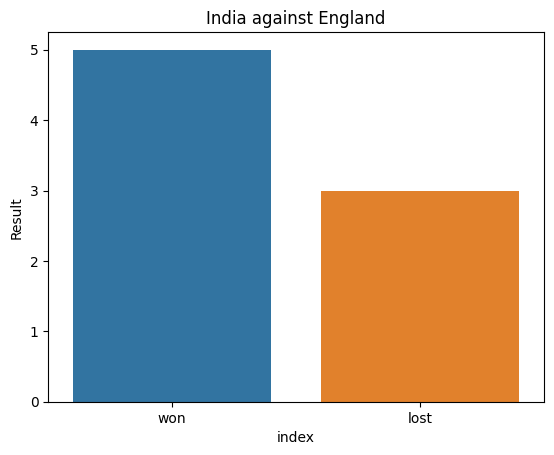

In [24]:
# india vs england
India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "India"]\
[WC_Grounds_History.Opposition.str.contains("England")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
sns.barplot(x = "index", y = "Result", data = India_vs_England).set_title("India against England")
